In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img=cv2.imread('parrot-animal.jpg')

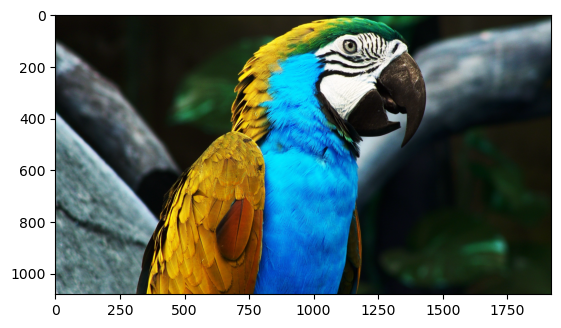

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

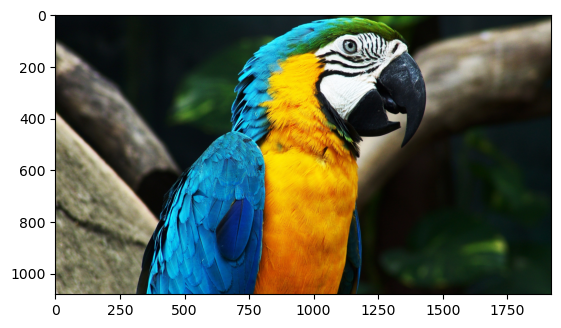

In [5]:
plt.imshow(img_rgb)
plt.show()

In [34]:
# Q1. Modify brightness
beta = 50  
bright_img = cv2.convertScaleAbs(img, alpha=1, beta=beta)  


In [35]:
# Q2. Modify contrast
alpha_low = 0.5
alpha_high = 2.0 
contrast_low = cv2.convertScaleAbs(img, alpha=alpha_low, beta=0)
contrast_high = cv2.convertScaleAbs(img, alpha=alpha_high, beta=0)


In [36]:
# Q3. Remove noise using linear filters
box_filter = cv2.blur(img, (5, 5)) 
gaussian_filter = cv2.GaussianBlur(img, (5, 5), 0)


In [37]:
# Q4. Remove noise using non-linear filter
median_filter = cv2.medianBlur(img, 5) 


In [38]:
# Q5. Identify edges using filters
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
edges_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5) 
edges_canny = cv2.Canny(gray_image, 100, 200)  

plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

(-0.5, 1919.5, 1079.5, -0.5)

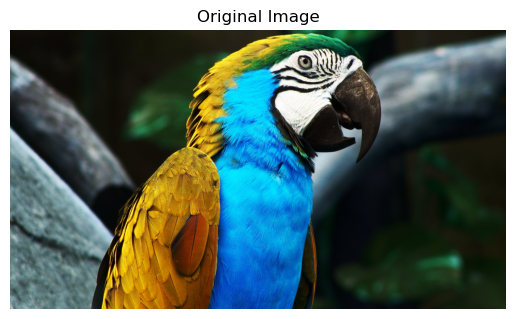

In [11]:
# Original and Brightness adjustment
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')


(-0.5, 1919.5, 1079.5, -0.5)

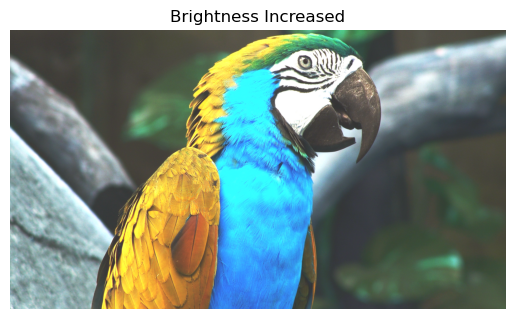

In [12]:
plt.imshow(bright_img)
plt.title("Brightness Increased")
plt.axis('off')


(-0.5, 1919.5, 1079.5, -0.5)

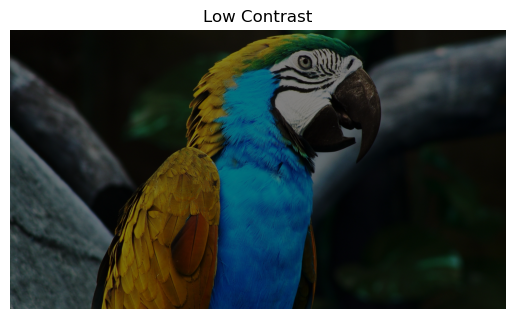

In [13]:
plt.imshow(contrast_low)
plt.title("Low Contrast")
plt.axis('off')


(-0.5, 1919.5, 1079.5, -0.5)

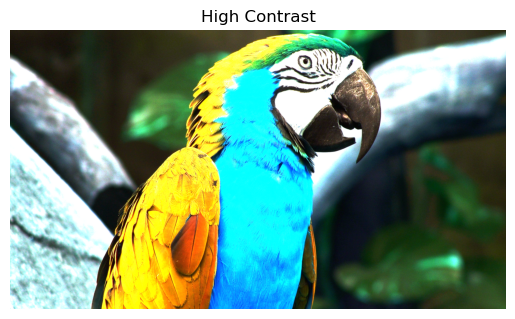

In [14]:
plt.imshow(contrast_high)
plt.title("High Contrast")
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

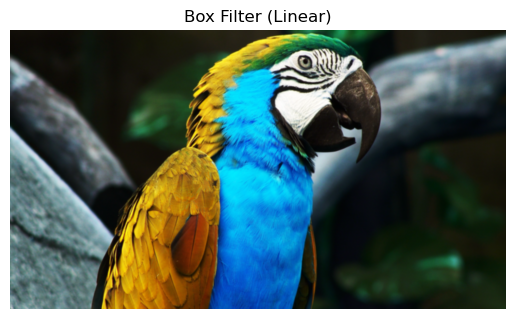

In [15]:
# Noise removal
plt.imshow(box_filter)
plt.title("Box Filter (Linear)")
plt.axis('off')


(-0.5, 1919.5, 1079.5, -0.5)

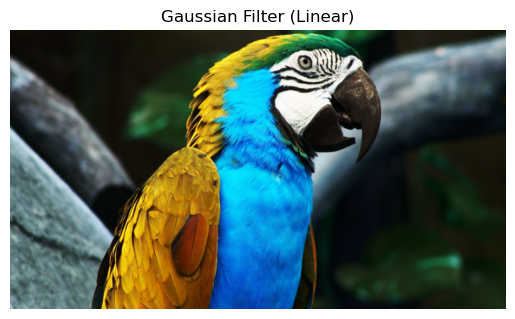

In [16]:
plt.imshow(gaussian_filter)
plt.title("Gaussian Filter (Linear)")
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

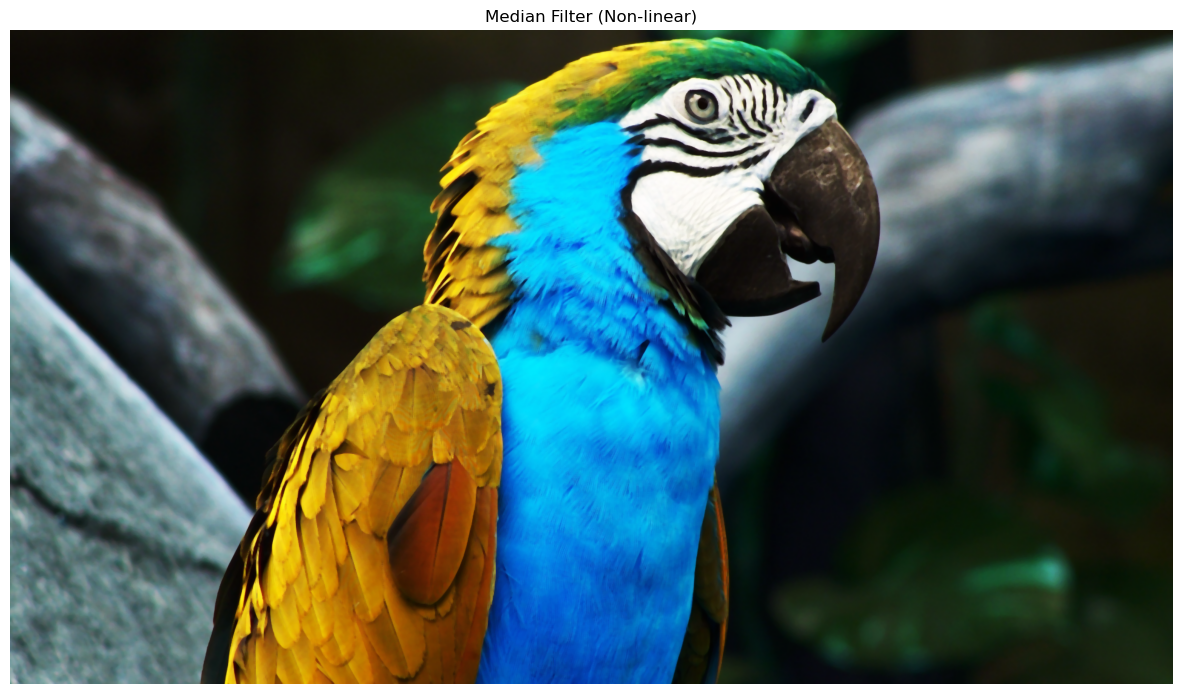

In [17]:
plt.figure(figsize=(15, 10))

# Non-linear filter
plt.imshow(median_filter)
plt.title("Median Filter (Non-linear)")
plt.axis('off')


## Q1.Write a program to compute the first-order gradients of an image in the x and y directions using Sobel filters. Combine the gradients to visualize edges.


In [19]:
image=cv2.imread("parrot-animal.jpg",cv2.IMREAD_GRAYSCALE)

In [20]:
sobel_x=cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)

In [23]:
abs_sobel_x=np.absolute(sobel_x)
abs_sobel_y=np.absolute(sobel_y)

In [24]:
edges_sobel = np.sqrt(abs_sobel_x**2 + abs_sobel_y**2)
edges_sobel = np.uint8(edges_sobel / edges_sobel.max() * 255)


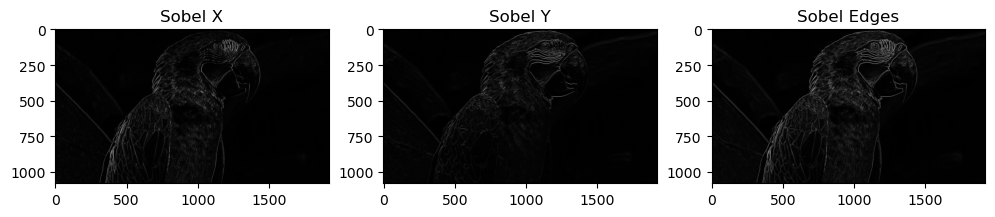

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(abs_sobel_x, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(abs_sobel_y, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.show()

## Q2.Apply edge thresholding (keep gradients above a threshold)

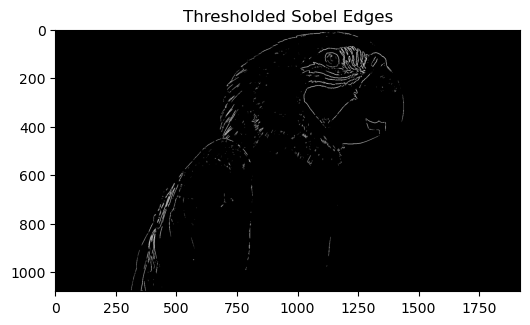

In [26]:
threshold = 100
edges_thresholded = np.where(edges_sobel > threshold, 255, 0).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.title("Thresholded Sobel Edges")
plt.imshow(edges_thresholded, cmap="gray")
plt.show()

## Q3.Apply the Canny edge detection algorithm

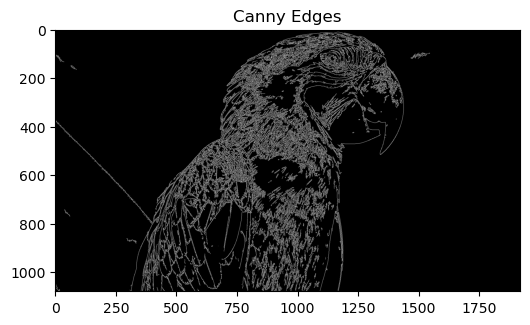

In [27]:
low_threshold = 50
high_threshold = 150
edges_canny = cv2.Canny(image, low_threshold, high_threshold)

plt.figure(figsize=(6, 6))
plt.title("Canny Edges")
plt.imshow(edges_canny, cmap="gray")
plt.show()

## Q4.Experiment with low and high thresholds for Canny

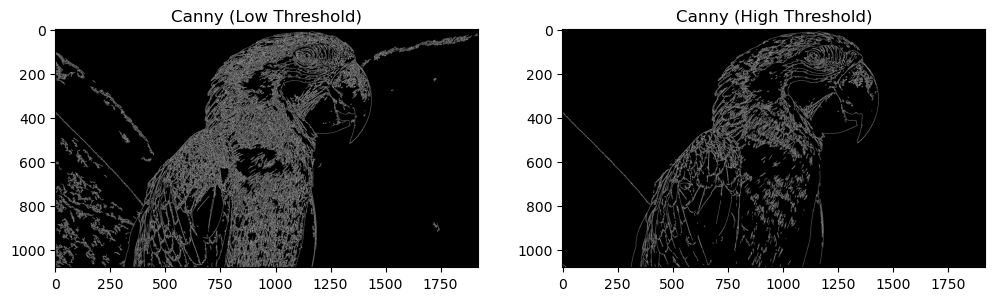

In [28]:
edges_canny_low = cv2.Canny(image, 30, 100)
edges_canny_high = cv2.Canny(image, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Canny (Low Threshold)")
plt.imshow(edges_canny_low, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Canny (High Threshold)")
plt.imshow(edges_canny_high, cmap="gray")
plt.show()


## Q5. Compare Sobel and Canny edges

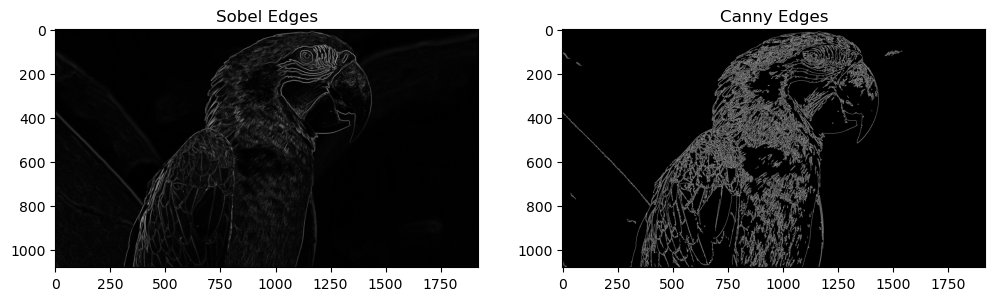

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Canny Edges")
plt.imshow(edges_canny, cmap="gray")
plt.show()

## Q6. Compute second-order gradients using the Laplacian operator

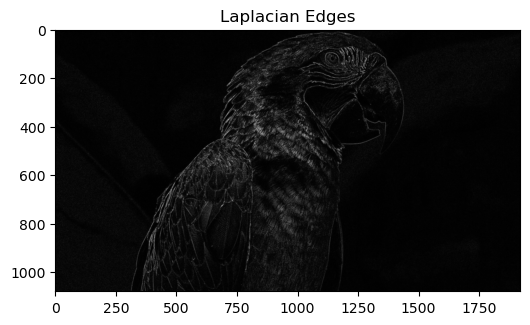

In [30]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(6, 6))
plt.title("Laplacian Edges")
plt.imshow(laplacian, cmap="gray")
plt.show()

## Q7. Apply Gaussian blurring before computing Laplacian edges

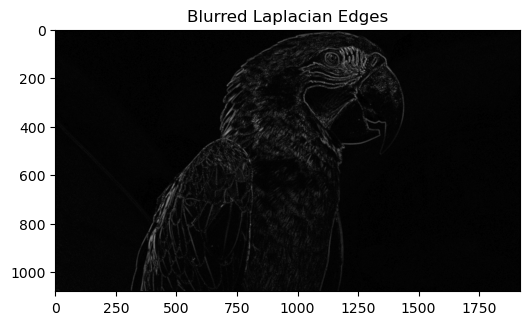

In [31]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
blurred_laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
blurred_laplacian = np.uint8(np.absolute(blurred_laplacian))

plt.figure(figsize=(6, 6))
plt.title("Blurred Laplacian Edges")
plt.imshow(blurred_laplacian, cmap="gray")
plt.show()

## Q8. Apply Sobel, Canny, and LoG side by side

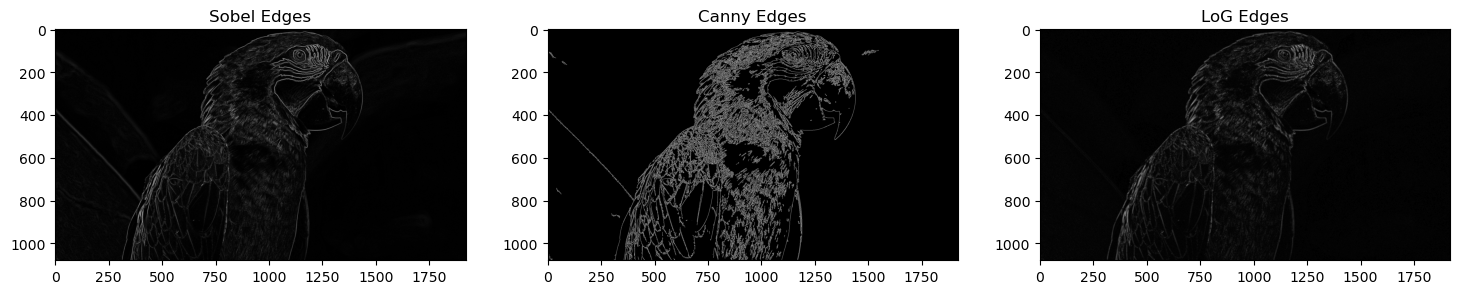

In [32]:
log = cv2.Laplacian(cv2.GaussianBlur(image, (5, 5), 0), cv2.CV_64F)
log = np.uint8(np.absolute(log))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Sobel Edges")
plt.imshow(edges_sobel, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges_canny, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("LoG Edges")
plt.imshow(log, cmap="gray")
plt.show()

## Q9. Add random noise and test edge detection

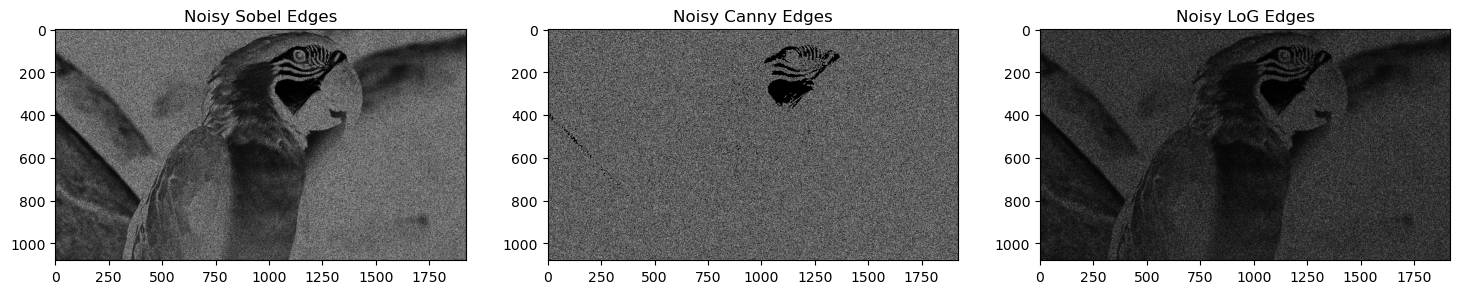

In [33]:
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

noisy_sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
noisy_sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
noisy_sobel = np.sqrt(np.absolute(noisy_sobel_x)**2 + np.absolute(noisy_sobel_y)**2)
noisy_sobel = np.uint8(noisy_sobel / noisy_sobel.max() * 255)

noisy_canny = cv2.Canny(noisy_image, low_threshold, high_threshold)
noisy_log = cv2.Laplacian(cv2.GaussianBlur(noisy_image, (5, 5), 0), cv2.CV_64F)
noisy_log = np.uint8(np.absolute(noisy_log))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Noisy Sobel Edges")
plt.imshow(noisy_sobel, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Noisy Canny Edges")
plt.imshow(noisy_canny, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Noisy LoG Edges")
plt.imshow(noisy_log, cmap="gray")
plt.show()
